<a href="https://colab.research.google.com/github/sburkley/CS-419/blob/master/labs/Sally's_decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/decisionTreez2.png)

#### Part of the [Inquiryum Machine Learning Fundamentals Course](http://inquiryum.com/machine-learning/)


In this notebook we are going to look at decision trees. Decision trees are robust machine learning algorithms in their own right, and also are the core component of random forest techniques and XGBoost.

Let's get some important stuff out of the way. Here are the advantages and disadvantages of decision trees:

### advantages

1. When it classifies an instance you can ask *why*. Most machine learning techniques are called **black box models** which means that when it makes a decision you can't go inside and see how that decision was made.  For example, consider a task where we have 100 attributes and we are trying to predict whether someone has a particular kind of cancer. With an algorithm like Naive Bayes, which relies on probabilities, we can't ask "How did you come to the conclusion that this person will have cancer?" In contrast, decision trees can provide an answer to that question. 
2. It requires minimal data wrangling. We don't need to scale columns. It can handle missing data (although, not with the sklearn implementation)
4. Once trained, it is fairly fast at making classifications. The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.

### disadvantages

1. Susceptible to overfitting the data. The training set is only a sample from some huge real world set (for example, even a training set of 1000 people who do and do not have diabetes, is tiny compared to all the people who do or do not have diabetes). The decision tree algorithm may add branches to the tree that improve performance for the instances in the dataset but decrease performance on the instances outside the dataset. This is the big wart on decision trees.
3. Learning the optimal decision tree is NP-complete. What this means is that the algorithm can create a pretty good classifier in a reasonable amount of time, but to create the very best classifier would take more time than there are grains of sand in the Ganges.


Let's get to a simple example. 

## Iris Dataset yet again
<img src="https://upload.wikimedia.org/wikipedia/commons/1/1e/IMG_7911-Iris_virginica.jpg" width="250" />

Here is a very simple basic example. We are going to use the Iris Dataset we used before.  As a reminder, the data set contains 3 classes of instances:

1. Iris Setosa 
2. Iris Versicolour 
3. Iris Virginica (the picture above)

There are only 4 attributes or features:

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 

Here is an example of the data:

Sepal Length|Sepal Width|Petal Length|Petal Width|Class
:--: | :--: |:--: |:--: |:--: 
5.3|3.7|1.5|0.2|Iris-setosa
5.0|3.3|1.4|0.2|Iris-setosa
5.0|2.0|3.5|1.0|Iris-versicolor
5.9|3.0|4.2|1.5|Iris-versicolor
6.3|3.4|5.6|2.4|Iris-virginica
6.4|3.1|5.5|1.8|Iris-virginica

The job of the classifier is to determine the class of an instance from the values of the attributes.

### Step 1: load the data

This dataset is so common that it is build into sklearn, but just for practice let's load our own csv file from

    https://raw.githubusercontent.com/zacharski/ml-class/master/data/iris.csv

In [3]:
 # you load it
import pandas as pd
from pandas import DataFrame
 iris = pd.read_csv('https://raw.githubusercontent.com/zacharski/ml-class/master/data/iris.csv')
 iris


,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### something new: splitting data into a training set and test set

When we used this Dataset before, I did some work for you. Namely, I divided the data into a training and test test. This time you loaded the entire dataset. With sklearn it is easy to divide a dataset into parts. Let's say I want to 80% of the data in the training set and 20 in the test set:

In [4]:
from sklearn.model_selection import train_test_split
iris_train, iris_test = train_test_split(iris, test_size = 0.2)
iris_train


,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
26,5.0,3.4,1.6,0.4,Iris-setosa
139,6.9,3.1,5.4,2.1,Iris-virginica
39,5.1,3.4,1.5,0.2,Iris-setosa
28,5.2,3.4,1.4,0.2,Iris-setosa
43,5.0,3.5,1.6,0.6,Iris-setosa
...,...,...,...,...,...
56,6.3,3.3,4.7,1.6,Iris-versicolor
16,5.4,3.9,1.3,0.4,Iris-setosa
53,5.5,2.3,4.0,1.3,Iris-versicolor
30,4.8,3.1,1.6,0.2,Iris-setosa


In [5]:
iris_test

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
27,5.2,3.5,1.5,0.2,Iris-setosa
105,7.6,3.0,6.6,2.1,Iris-virginica
19,5.1,3.8,1.5,0.3,Iris-setosa
22,4.6,3.6,1.0,0.2,Iris-setosa
125,7.2,3.2,6.0,1.8,Iris-virginica
34,4.9,3.1,1.5,0.1,Iris-setosa
61,5.9,3.0,4.2,1.5,Iris-versicolor
116,6.5,3.0,5.5,1.8,Iris-virginica
89,5.5,2.5,4.0,1.3,Iris-versicolor
83,6.0,2.7,5.1,1.6,Iris-versicolor


Nice! `train_test_split` as the name suggests divides a dataset (it's first argument) into a training set and a test set. In this case we added the parameter `test_size=0.2` which specifies that 20% of the original data is to be put in the test set.  So

```
iris_train, iris_test = train_test_split(iris, test_size = 0.2)
```
creates a Pandas dataframe called `iris_train` that contains 80% of the date and a dataframe called `iris_test` that contains 20%.

### Step 2: create a decision tree classifier
Now it is time to create a decision tree classifier using entropy:


In [6]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy')

### Step 3: train the classifier on the data:
(the arguments are the same as the knn classifier)


In [7]:
clf.fit(iris_train[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']], iris_train['Class'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Parsing

```
clf.fit(iris_train[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']], iris_train['Class'])
```

`clf` is our decision tree classifier. `fit` means to train the classifier on the dataset. `iris_train[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']]` are all the feature columns of the training set (based on these we want to make a prediction) and we are trying to predict `iris_train['Class']` 

### Viewing our decision tree

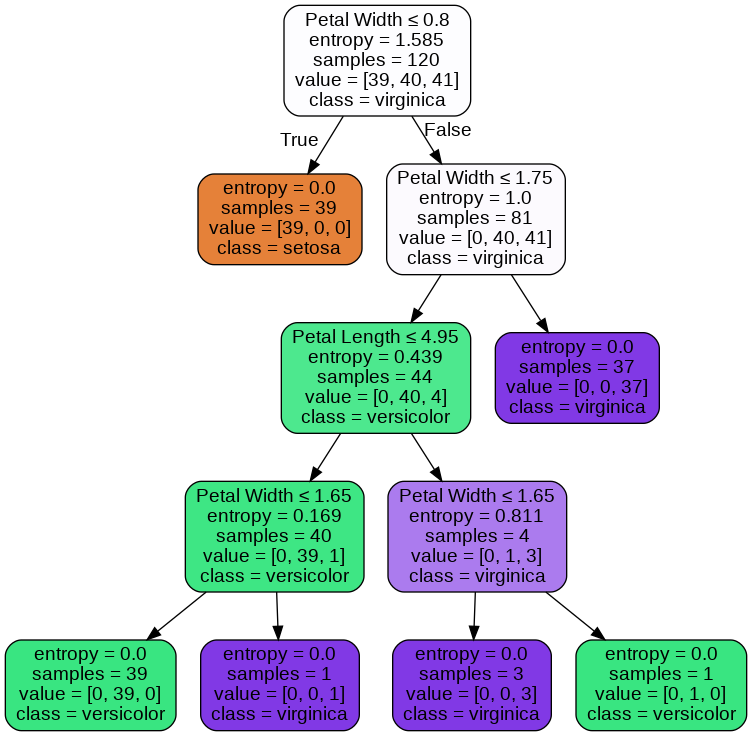

In [8]:
from IPython.display import Image  
import pydotplus
dot_data = tree.export_graphviz(clf, out_file="iris.dot", 
                         feature_names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'],  
                         class_names=['setosa', 'versicolor', 'virginica'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graphviz.graph_from_dot_file("iris.dot")
#graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png()) 

Ok. that is cool.

When I did this the first few nodes of the tree looked like:

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/tree3.png)

Let's parse that out a bit. The first node looks like:

```
Petal Length <= 2.45
entropy = 1.583
samples=120
values = [37, 41, 42]
class = virginica
```
Let's skip the first line for a moment and look at the lines:

```
samples=120
values = [37, 41, 42]
```
The number of samples is 120. 37 of them are setosa, 41 are versicolor, and 42 are virginica. So if this is all the information you had to guess with, you would select virginica since most of the samples are virginica. That is how we get

```
class = virginica
```
From the samples and values lines we can calculate entropy, or info:

$$
info([37, 41, 42])=-\sum{37\over120}log_2{({37\over120})}+{41\over120}log_2{({41\over120})}+{42\over120}log_2{({42\over120})} = 1.583
$$

So the entropy of the node is 1.583.  

To recap, we examined all the lines of


```
Petal Length <= 2.45
entropy = 1.583
samples=120
values = [37, 41, 42]
class = virginica
```
except the first.

The first line contains the first question: *Is the petal length smaller or equal to 2.45*. If that is true we follow the left link to the node:

```
entropy=0.0
samples=37
values=[37,0,0]
class = setosa
```

It turns out that 37 of the samples have a petal length less than or equal to 2.45 and all of them are setosa. If we get a new sample and its petal length is 2.37, we would classify it as setosa. 
Let's examine the node on the right:

```
Petal Length <= 1.75
entropy= 1.0
samples= 83
values=[0, 41, 42]
class = virginica
```
It turns out that 83 of the samples have a petal length greater than 2.45 (we are following the 'no' link from the root node) 

Look over the nodes of the tree you constructed to gain a good understanding of what a decision tree looks like.

That was a bit of an diversion (although, an important one) so let's recap.

#### step 1. we created a classifier

```
clf = tree.DecisionTreeClassifier(criterion='entropy')
```
#### step 2. we trained the classifier on the data
```
clf.fit(iris_train[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']], iris_train['Class'])
```
We are fitting a classifier that uses the columns Sepal Length, Sepal Width, Petal Length, and Petal Width to predict Class.

#### step 3. use the classifier to classifier instances from out test set.
Once we fit our classifier to the data (i.e. we trained it) we can use the classifier to classifier samples. let's try it on the test set:


In [9]:
iris_predictions = clf.predict(iris_test[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']])
from sklearn.metrics import accuracy_score
accuracy_score(iris_test['Class'], iris_predictions)
#, iris_train['Class'])

0.9333333333333333

Great! You should get 100% or near 100% accuracy on that small dataset.

### Adjusting Max Depth

The depth of a decision tree is how many rows of nodes there are excluding the root node. In the case of the tree above, the depth was likely to be 5. 

We can limit depth by using the `max_depth` parameter when we construct our DecisionTreeClassifier.

Let's try it with a max depth of 4 (notice in the first line of code we added `max_depth=4`)

In [10]:
clf_maxdepth4 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf_maxdepth4.fit(iris_train[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']], iris_train['Class'])
iris_predictions = clf_maxdepth4.predict(iris_test[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']])
from sklearn.metrics import accuracy_score
accuracy_score(iris_test['Class'], iris_predictions)

0.9333333333333333

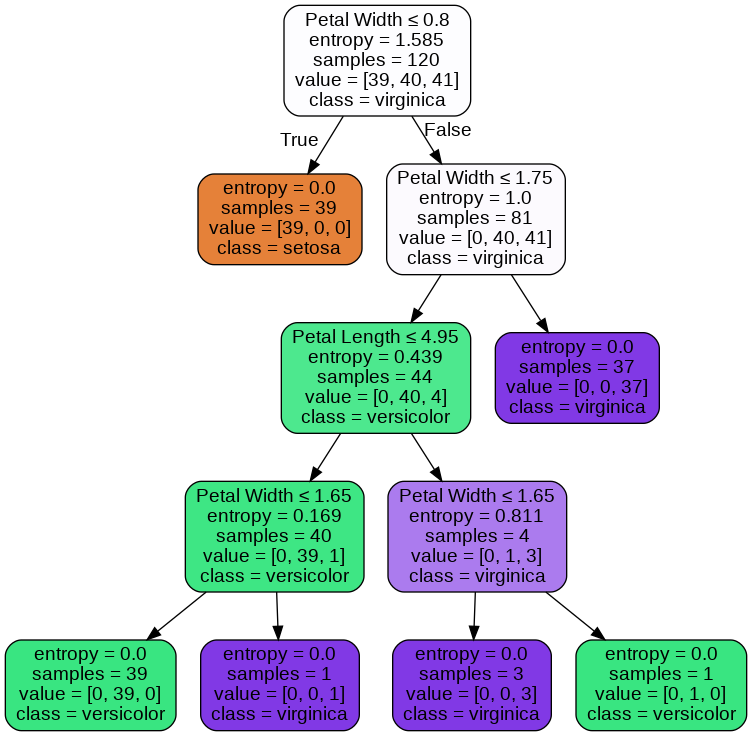

In [11]:
dot_data = tree.export_graphviz(clf_maxdepth4, out_file="iris4.dot", 
                         feature_names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'],  
                         class_names=['setosa', 'versicolor', 'virginica'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graphviz.graph_from_dot_file("iris4.dot")
#graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

I already mentioned that a negative of decision trees are that they may overfit the training data.  If we allow for unbounded depth the risk of overfitting greatly increases. We can reduce the risk of overfitting by limiting the depth as we just did.

## You try: Pima

The Pima Indians Diabetes Data Set was developed by the
United States National Institute of Diabetes and Digestive and Kidney Diseases. 

Astonishingly, over 30% of Pima people develop diabetes. In contrast, the diabetes rate in
the United States is 8.3% and in China it is 4.2%.

Each instance in the dataset represents information about a Pima woman over the age of 21
and belonged to one of two classes: a person who developed diabetes within five years, or a
person that did not. There are eight attributes in addition to the column representing whether or not they developed diabetes:


1.  The number of times the woman was pregnant
2.  Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3.  Diastolic blood pressure (mm Hg)
4.  Triceps skin fold thickness (mm) 
5.  2-Hour serum insulin (mu U/ml) 
6.  Body mass index (weight in kg/(height in m)^2) 
7.  Diabetes pedigree function 
8.  Age
9.  Whether they got diabetes or not (0 = no, 1 = yes)


The csv file at  is at

    https://raw.githubusercontent.com/yew1eb/machine-learning/master/Naive-bayes/pima-indians-diabetes.data.csv
    
<span style="color:red">This file does not have a header row</span>

You will need to 

1. load the file into a dataframe
2. divide the data into training and test sets. (an 80-20 split sounds good)
3. train a decision tree classifier on the training data 
3. display the tree
3. run the classifier on the test data
4. compute the accuracy

Good luck!

In [17]:
pima_diabetes = pd.read_csv('https://raw.githubusercontent.com/yew1eb/machine-learning/master/Naive-bayes/pima-indians-diabetes.data.csv', names=['pregnancies', 'plasma', 'BP', 'skin fold', 'insulin', 'BMI', 'pedigree', 'age', 'diabetes'])
dtc = tree.DecisionTreeClassifier(criterion='entropy') #made the classifier
pima_train, pima_test = train_test_split(pima_diabetes, test_size = 0.2) #divided the trianing and test sets
pima_train

,pregnancies,plasma,BP,skin fold,insulin,BMI,pedigree,age,diabetes
357,13,129,0,30,0,39.9,0.569,44,1
670,6,165,68,26,168,33.6,0.631,49,0
546,5,187,76,27,207,43.6,1.034,53,1
437,5,147,75,0,0,29.9,0.434,28,0
392,1,131,64,14,415,23.7,0.389,21,0
...,...,...,...,...,...,...,...,...,...
713,0,134,58,20,291,26.4,0.352,21,0
512,9,91,68,0,0,24.2,0.200,58,0
638,7,97,76,32,91,40.9,0.871,32,1
520,2,68,70,32,66,25.0,0.187,25,0


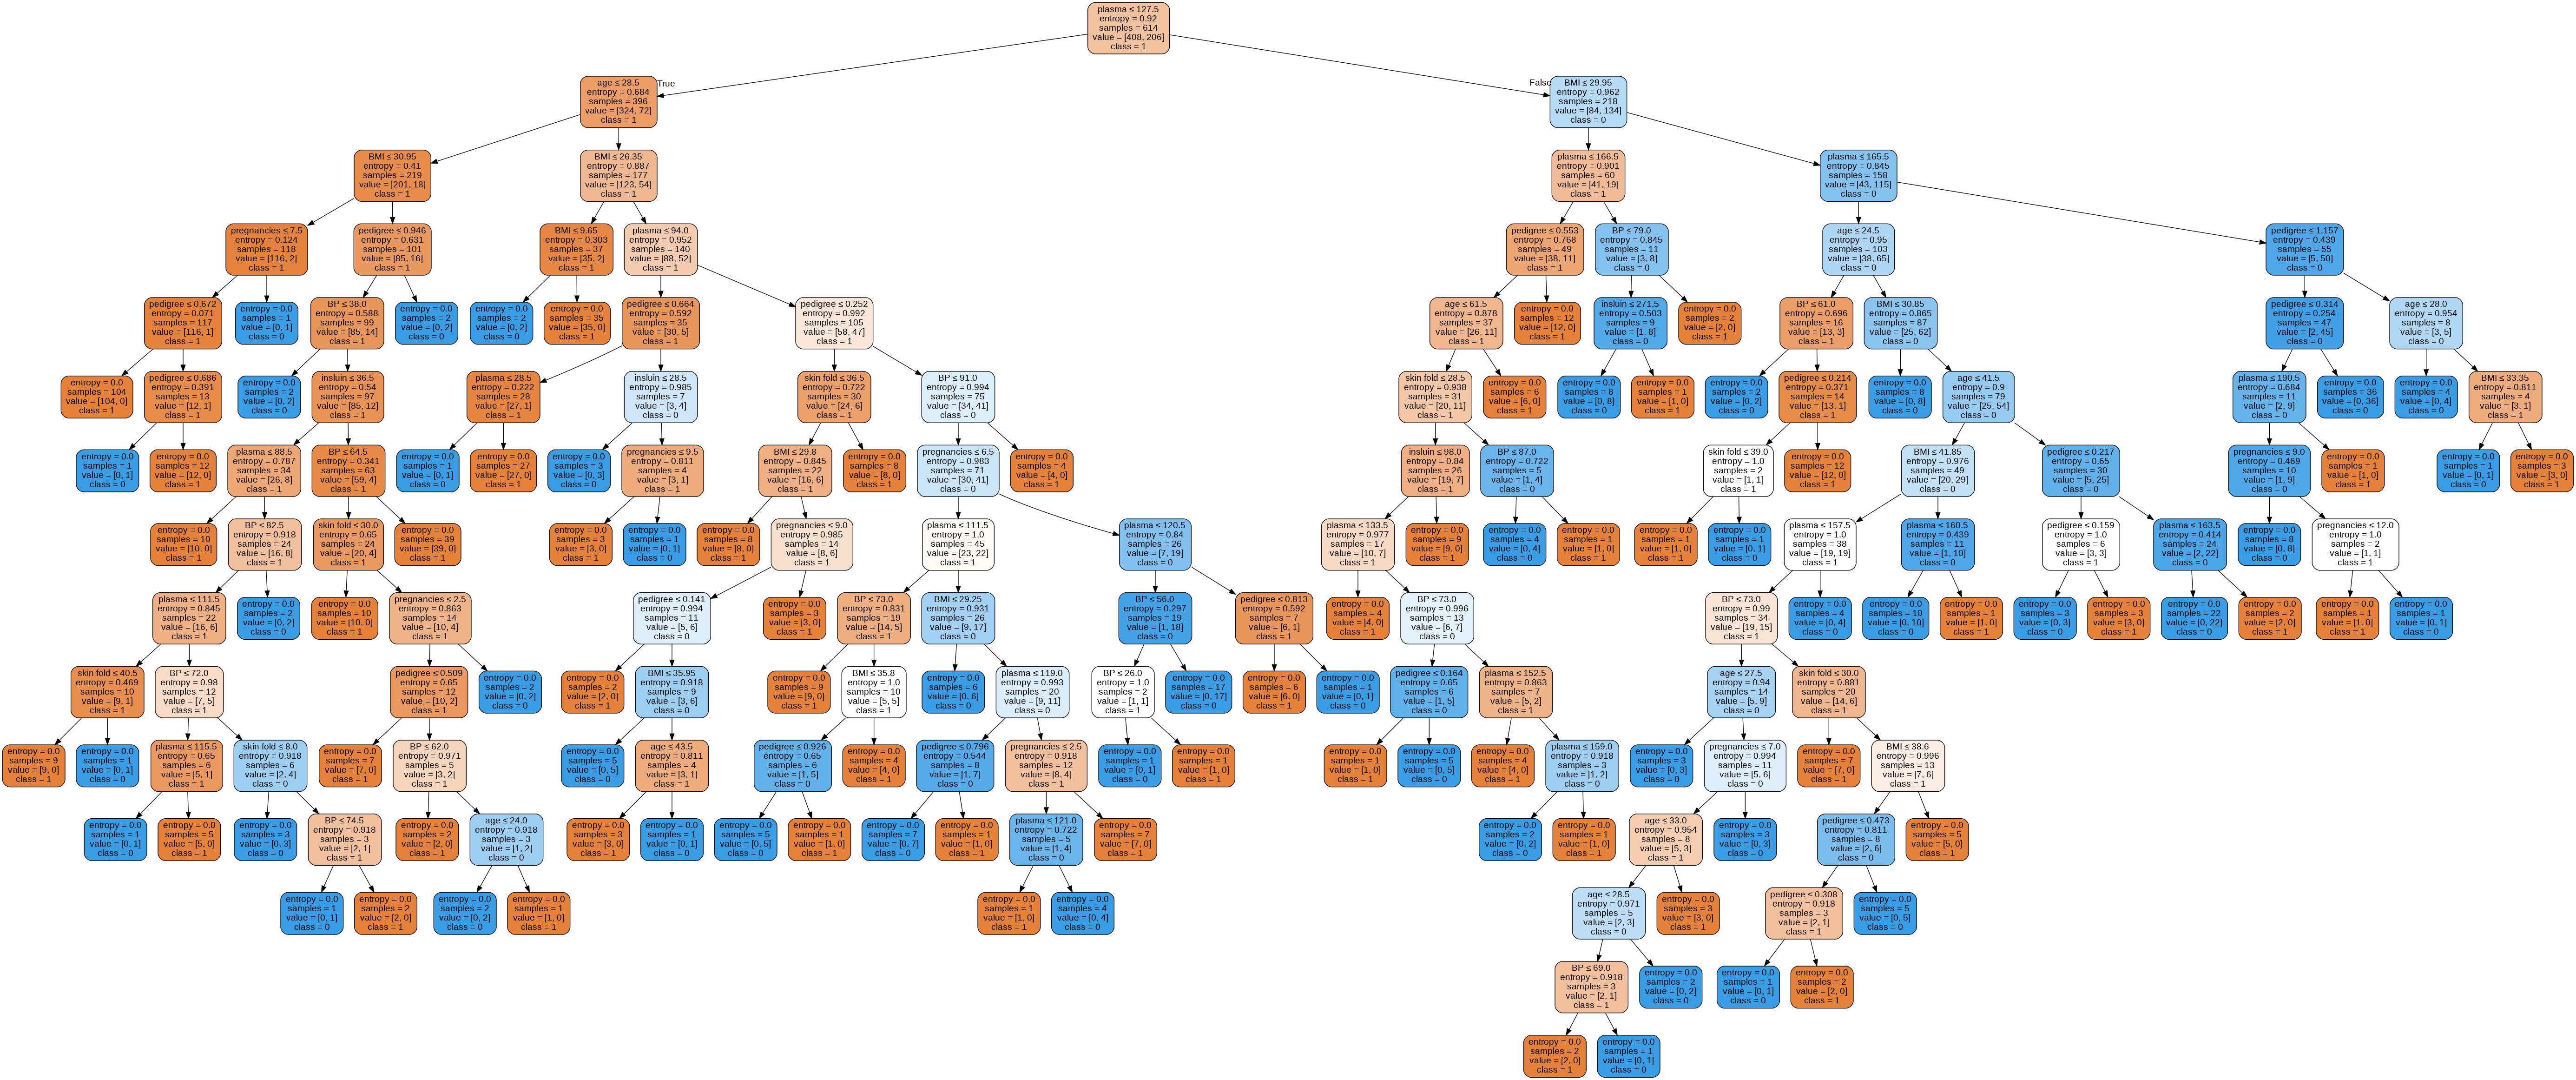

In [20]:
dtc.fit(pima_train[['pregnancies', 'plasma', 'BP', 'skin fold', 'insulin', 'BMI', 'pedigree', 'age']], pima_train['diabetes'])#trained
dot_data = tree.export_graphviz(dtc, out_file="pima.dot", 
                         feature_names=['pregnancies', 'plasma', 'BP', 'skin fold', 'insluin', 'BMI', 'pedigree', 'age'],  
                         class_names=['1', '0'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graphviz.graph_from_dot_file("pima.dot")
Image(graph.create_png())

In [23]:
pima_predictions = dtc.predict(pima_test[['pregnancies', 'plasma', 'BP', 'skin fold', 'insulin', 'BMI', 'pedigree', 'age']])
accuracy = accuracy_score(pima_test['diabetes'], pima_predictions)
print(pima_predictions)
print(str(accuracy))

[1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0
 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0
 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1
 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0]
0.6818181818181818


In [ ]:
### Breast Cancer Wisconsin 

The task is to predict whether a tumor is malignant or benign (the second column of the  dataset based on 30 real values. 

The data file is


https://raw.githubusercontent.com/zacharski/ml-class/master/data/wdbc.data


And a writeup about the data is at:

https://raw.githubusercontent.com/zacharski/ml-class/master/data/wdbc.names

Follow the same steps as above.

In [27]:
cancer = pd.read_csv('https://raw.githubusercontent.com/zacharski/ml-class/master/data/wdbc.data', names=['ID', 'diagnosis', '3', '4', '5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32'])
dtc = tree.DecisionTreeClassifier(criterion='entropy') #made the classifier
cancer_train, cancer_test = train_test_split(cancer, test_size = 0.2) #divided the trianing and test sets

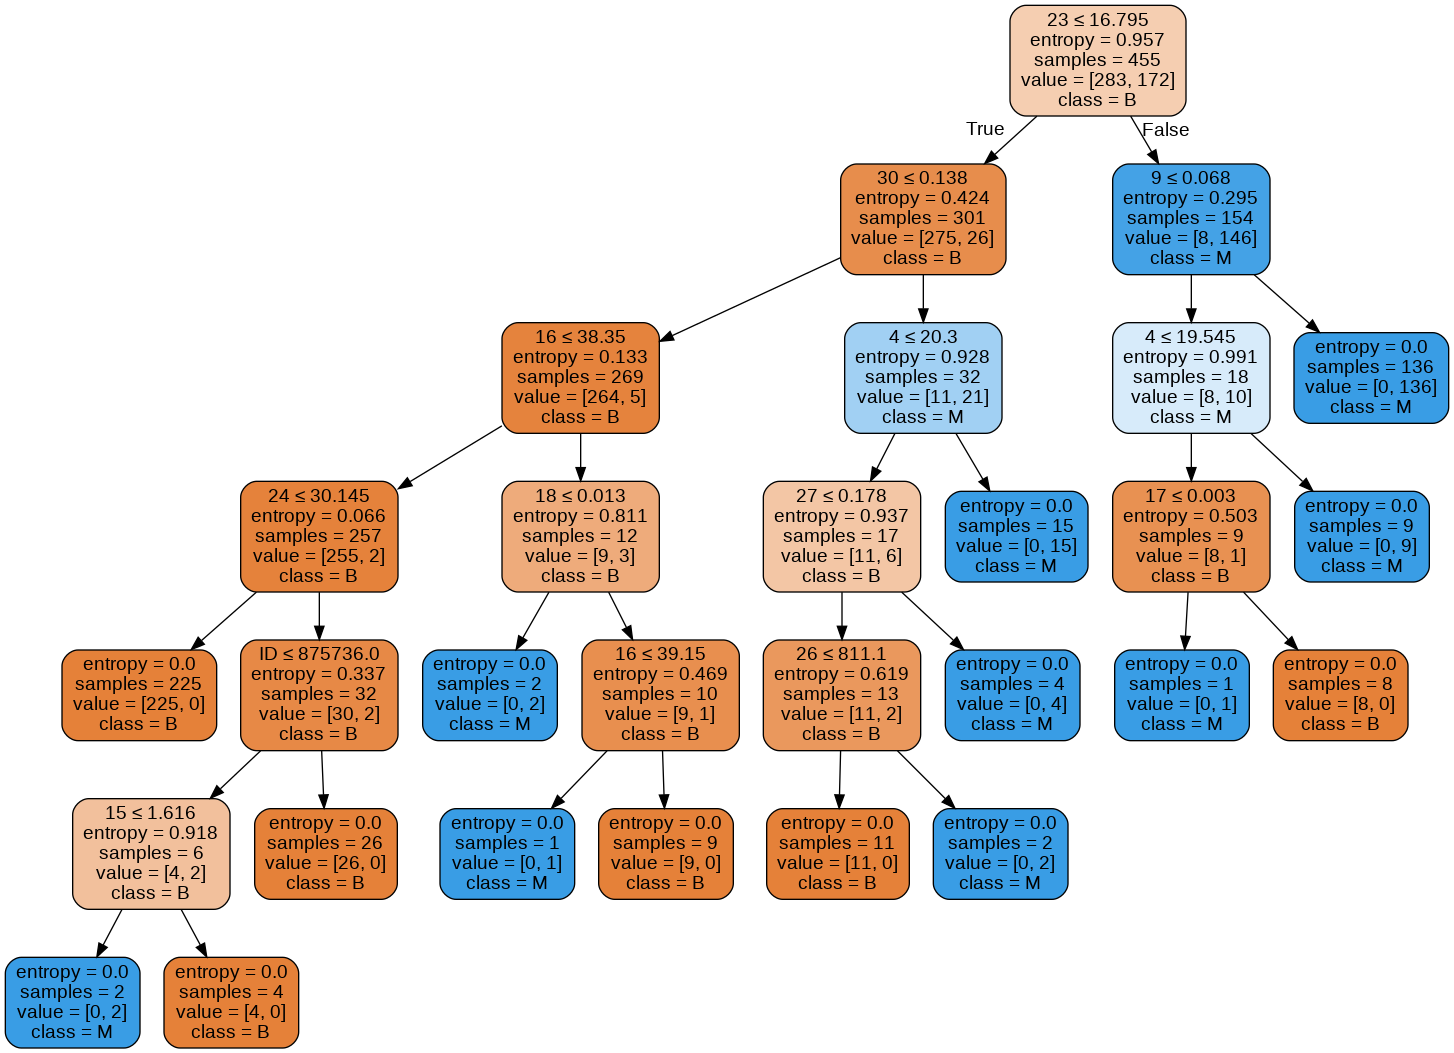

In [28]:
dtc.fit(cancer_train[['ID', '3', '4', '5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32']], cancer_train['diagnosis'])#trained
dot_data = tree.export_graphviz(dtc, out_file="cancer.dot", 
                         feature_names=['ID', '3', '4', '5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32'],  
                         class_names=['B', 'M'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graphviz.graph_from_dot_file("cancer.dot")
Image(graph.create_png())

In [30]:
cancer_predictions = dtc.predict(cancer_test[['ID', '3', '4', '5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32']])
accuracy = accuracy_score(cancer_test['diagnosis'], cancer_predictions)
print(cancer_predictions)
print(str(accuracy))

['B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B'
 'M' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B'
 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'B' 'M' 'M']
0.9210526315789473
